# EXPLORACIÓN DE LOS DATOS

<code> Proyecto NOVELLA </code>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("EXPLORAR.csv")

In [3]:
df = df.iloc[:, 3:]

In [4]:
df.shape

(4616, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           4616 non-null   object 
 1   Author          4615 non-null   object 
 2   Description     4597 non-null   object 
 3   Date            4616 non-null   object 
 4   Weeks on List   1253 non-null   float64
 5   potencialBS     4616 non-null   int64  
 6   Rating          4616 non-null   float64
 7   NumPages        4616 non-null   int64  
 8   GenresList      4616 non-null   object 
 9   Type            4616 non-null   object 
 10  DatePublished   4616 non-null   object 
 11  SagaNumber      4616 non-null   int64  
 12  RedPerc         4616 non-null   float64
 13  BluePerc        4616 non-null   float64
 14  GreenPerc       4616 non-null   float64
 15  DaysDifference  4616 non-null   int64  
 16  BelongSaga      4616 non-null   bool   
 17  Price           4616 non-null   f

In [6]:
df.describe()

,Weeks on List,potencialBS,Rating,NumPages,SagaNumber,RedPerc,BluePerc,GreenPerc,DaysDifference,Price,WordsTitle
count,1253.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000,4616.000000
mean,6.741421,0.271447,3.923845,365.460355,2.715771,0.475641,0.421776,0.437766,433.583406,18.305223,3.258666
std,17.228177,0.444754,0.318396,122.783563,6.042878,0.229263,0.203693,0.197579,2598.476364,5.631614,1.566106
min,1.000000,0.000000,2.520000,11.000000,0.000000,0.010000,0.010000,0.030000,4.000000,0.990000,1.000000
25%,1.000000,0.000000,3.710000,308.000000,1.000000,0.280000,0.260000,0.280000,20.000000,14.990000,2.000000
50%,2.000000,0.000000,3.940000,352.000000,1.000000,0.450000,0.400000,0.420000,20.000000,17.500000,3.000000
75%,5.000000,1.000000,4.160000,401.000000,1.000000,0.660000,0.570000,0.590000,20.000000,21.015000,4.000000
max,212.000000,1.000000,4.810000,2895.000000,63.000000,0.990000,0.940000,0.950000,65332.000000,68.490000,16.000000


### Ratios

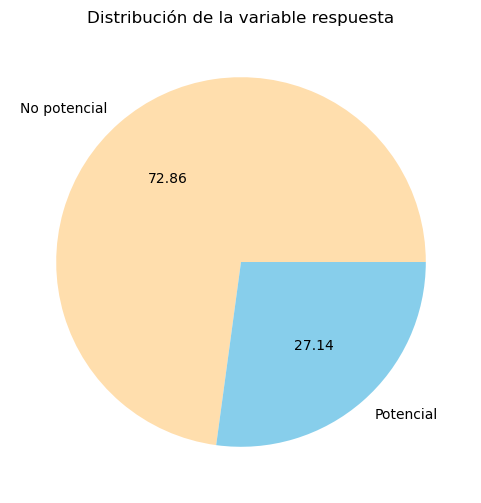

In [7]:
plt.figure(figsize=(6, 6))

counts = df["potencialBS"].value_counts()
plt.pie(counts, labels=["No potencial", "Potencial"], colors = ["NavajoWhite", "SkyBlue"],autopct='%1.2f')
plt.title('Distribución de la variable respuesta')
plt.show()

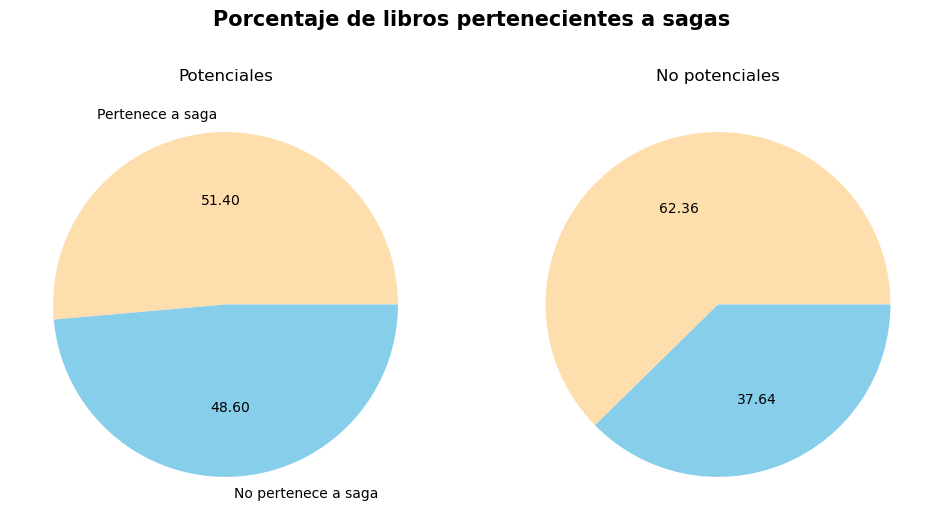

In [8]:
etiquetasSaga = ['Pertenece a saga', 'No pertenece a saga']

potencialSaga = df[df['potencialBS'] == 1]['BelongSaga'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(potencialSaga, labels=etiquetasSaga, autopct='%1.2f', colors = ["NavajoWhite", "SkyBlue"])
plt.title('Potenciales')

noPotencialSaga = df[df['potencialBS'] == 0]['BelongSaga'].value_counts()

plt.subplot(1, 2, 2)
plt.pie(noPotencialSaga , autopct='%1.2f', colors = ["NavajoWhite", "SkyBlue"])
plt.title('No potenciales')

plt.suptitle("Porcentaje de libros pertenecientes a sagas", y=1.05, fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

### Géneros más presentes

In [9]:
# Dividimos la columna GenresList en listas de géneros
df['GenresList'] = df['GenresList'].apply(lambda x: x.strip('[]').replace("'", "").split(", "))

In [10]:
# Contamos el número de géneros distintos
generosDistintos = set()
for row in df['GenresList']:
    generosDistintos.update(row)

totalGeneros = len(generosDistintos)
print("Número de géneros distintos:", totalGeneros)

Número de géneros distintos: 337


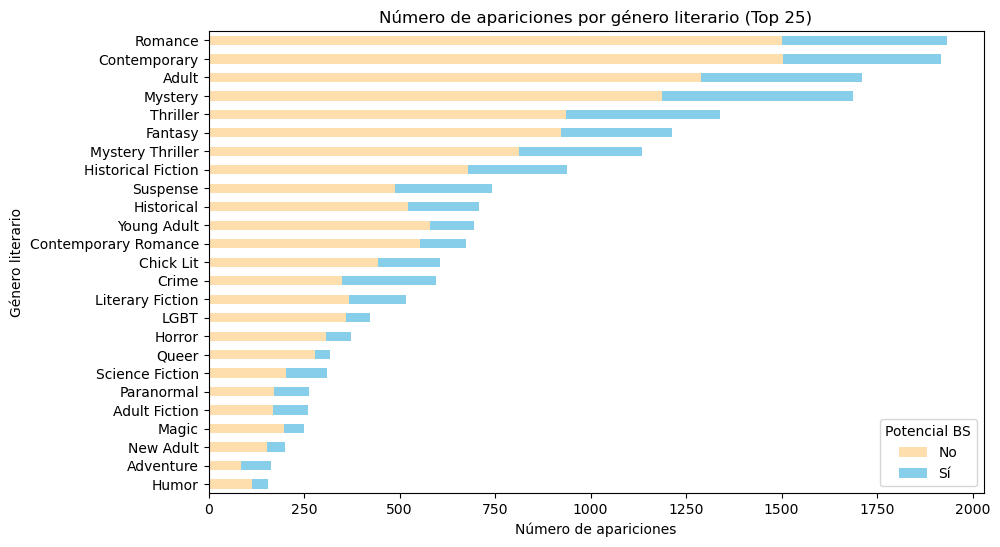

In [11]:
# Contamos las ocurrencias de cada género para cada valor de PotencialBS
generosPorPotencial = df.apply(lambda row: pd.Series(row['GenresList']), axis=1).stack().reset_index(level=1, drop=True)
generosPorPotencial.name = 'Genre'
generosPorPotencial = df.drop('GenresList', axis=1).join(generosPorPotencial)
generosPorPotencial= generosPorPotencial.groupby(['potencialBS', 'Genre']).size().unstack(fill_value=0)

# Seleccionamos los 15 primeros géneros (excluyendo "fiction" y "audiobook")
topGeneros = generosPorPotencial.sum().nlargest(27)[2:]

# Filtramos los géneros y reordenamos las columnas
generosPorPotencial = generosPorPotencial[topGeneros.index]

# Creamos el gráfico de barras apiladas
generosPorPotencial = generosPorPotencial.transpose()
generosPorPotencial.plot(kind='barh', stacked=True, figsize=(10, 6), color = ["NavajoWhite", "SkyBlue"])
plt.legend(title='Potencial BS', labels=['No', 'Sí'])
plt.title('Número de apariciones por género literario (Top 25)')
plt.xlabel('Número de apariciones')
plt.ylabel('Género literario')
plt.gca().invert_yaxis()
plt.show()

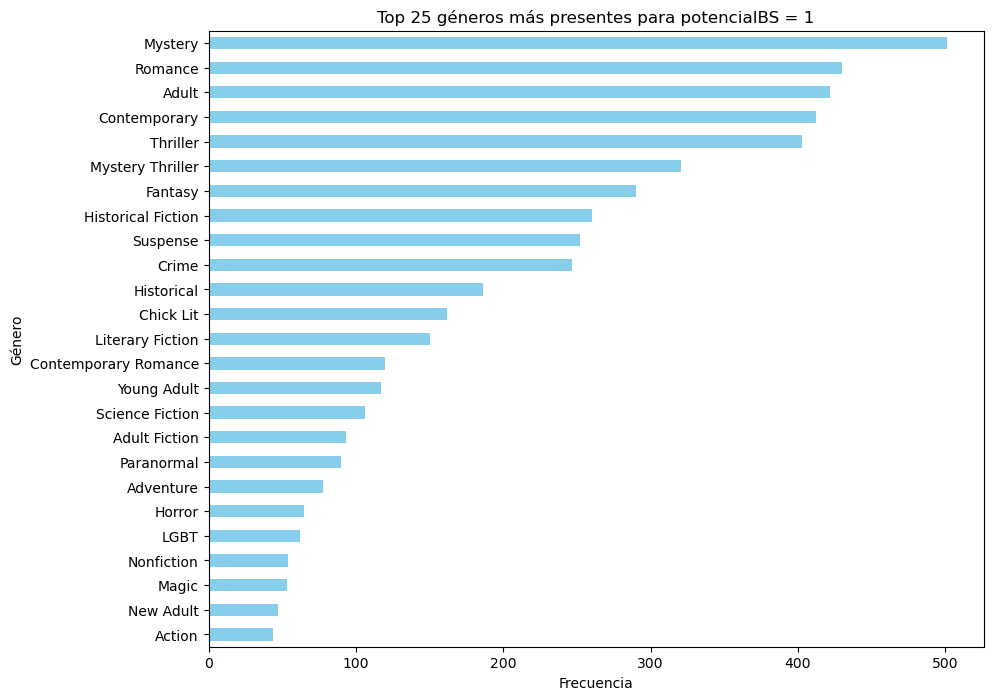

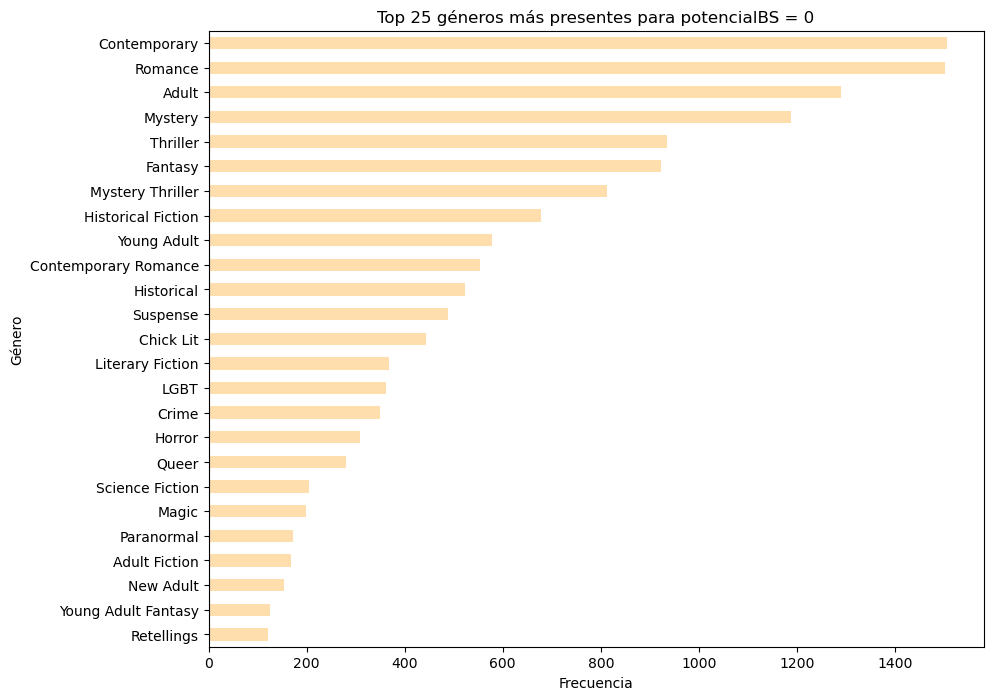

In [12]:
df_potential_1 = df[df['potencialBS'] == 1]
df_potential_0 = df[df['potencialBS'] == 0]

# Contamos la frecuencia de cada género para potencialBS = 1
generosPotencial = pd.Series([genre for sublist in df_potential_1['GenresList'] for genre in sublist]).value_counts()[2:].head(25)

# Contamos la frecuencia de cada género para potencialBS = 0
genre_counts_0 = pd.Series([genre for sublist in df_potential_0['GenresList'] for genre in sublist]).value_counts()[2:].head(25)

# Gráfico para potencialBS = 1
plt.figure(figsize=(10, 8))
generosPotencial.plot(kind='barh', color="SkyBlue")
plt.title('Top 25 géneros más presentes para potencialBS = 1')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.gca().invert_yaxis()
plt.show()

# Gráfico para potencialBS = 0
plt.figure(figsize=(10, 8))
genre_counts_0.plot(kind='barh', color="NavajoWhite" )
plt.title('Top 25 géneros más presentes para potencialBS = 0')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.gca().invert_yaxis()
plt.show()

### Diagramas de cajas y bigotes

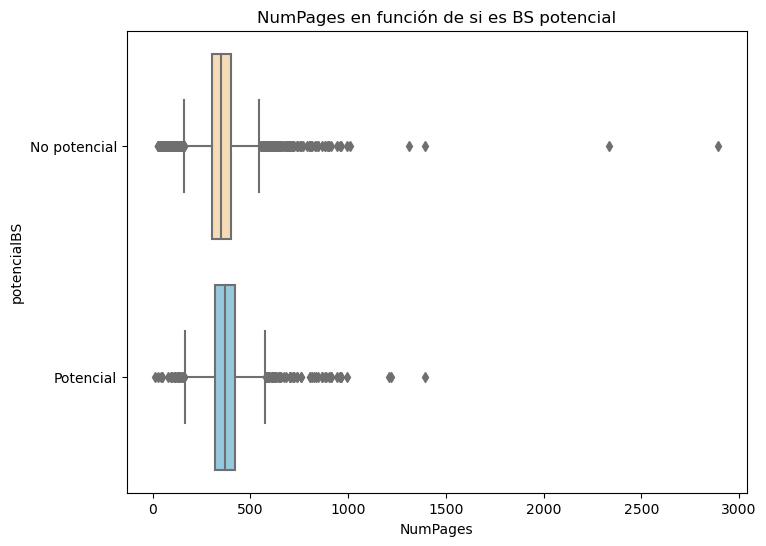

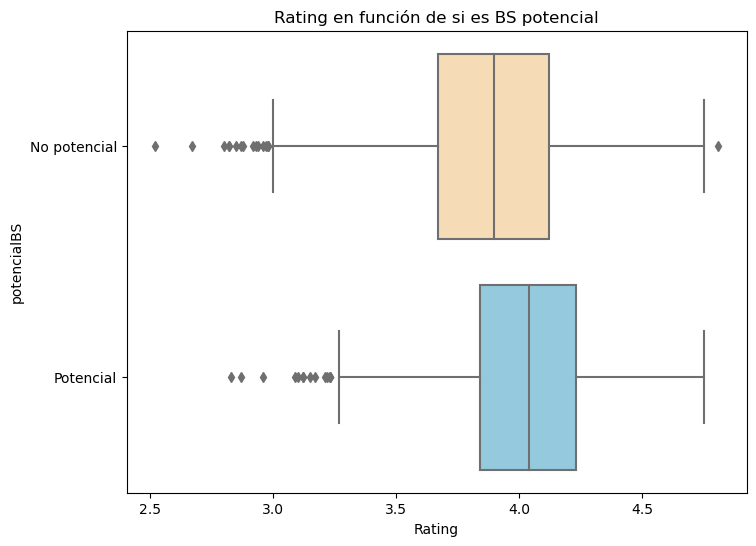

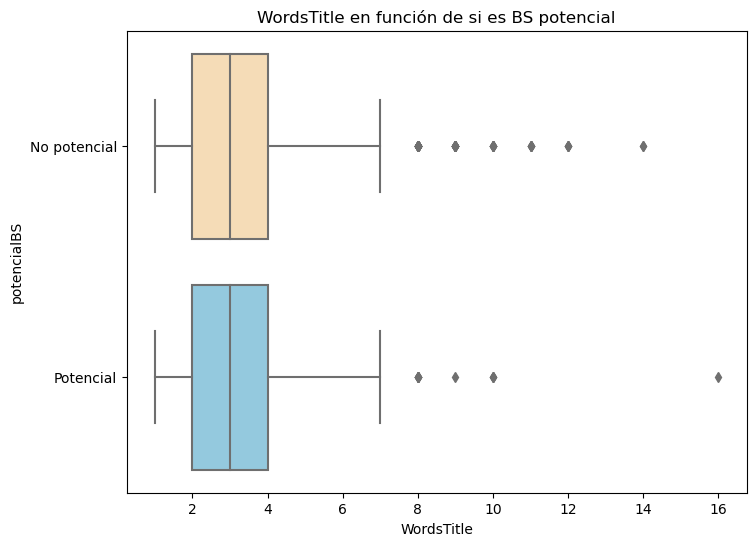

In [13]:
# Lista de variables 
variables = ['NumPages', 'Rating', 'WordsTitle']

colors = ["NavajoWhite", "SkyBlue"]

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(y='potencialBS', x=variable, data=df, orient='h', palette = colors)
    plt.title(f'{variable} en función de si es BS potencial')
    plt.ylabel('potencialBS')
    plt.xlabel(variable)
    
    ax.set_yticklabels(['No potencial', 'Potencial'])
    
    plt.show()

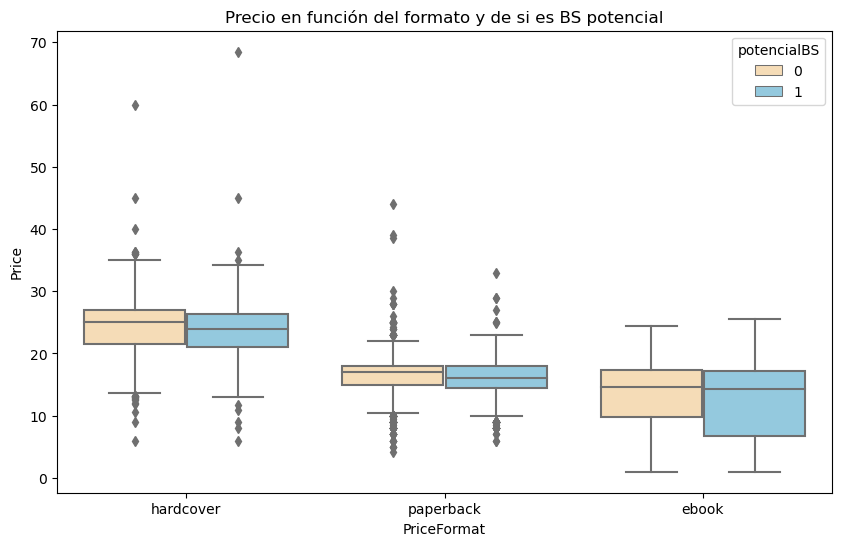

In [14]:
# Ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='PriceFormat', y='Price', hue='potencialBS', data=df, palette = colors)

# Añadir título y etiquetas a los ejes
plt.title('Precio en función del formato y de si es BS potencial')
plt.xlabel('PriceFormat')
plt.ylabel('Price')

# Mostrar el gráfico
plt.show()

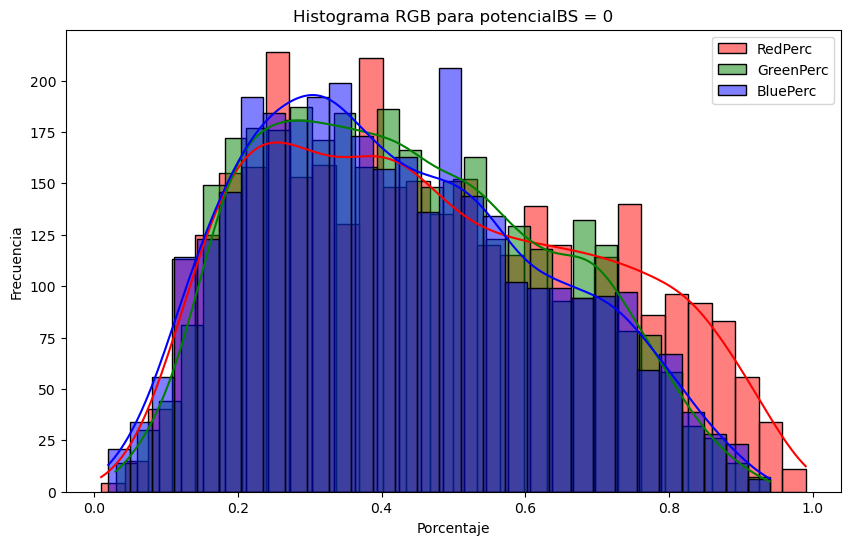

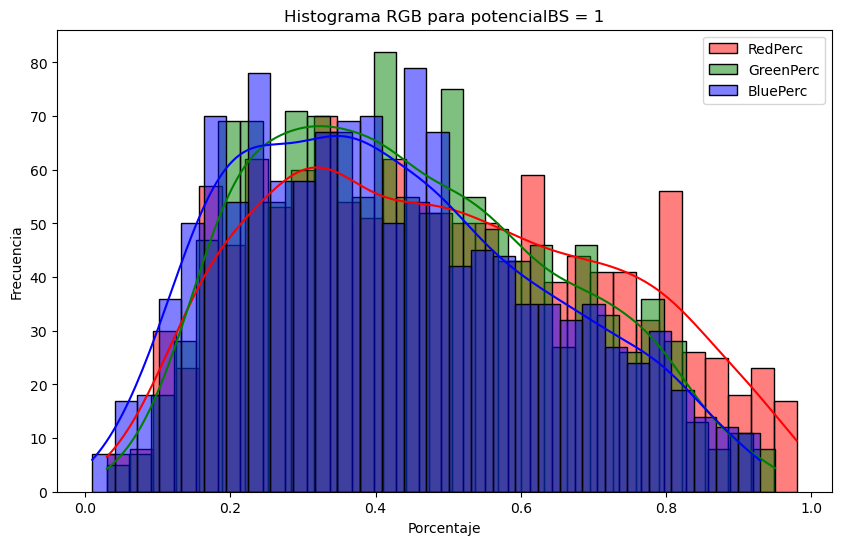

In [15]:
for i in range(0, 2):
    df1 = df[df["potencialBS"] == i]
    
    # Ajusta el tamaño de la figura si es necesario
    plt.figure(figsize=(10, 6))

    # Histograma para RedPerc
    sns.histplot(df1['RedPerc'], color='red', bins=30, kde=True, alpha=0.5, label='RedPerc')

    # Histograma para GreenPerc
    sns.histplot(df1['GreenPerc'], color='green', bins=30, kde=True, alpha=0.5, label='GreenPerc')

    # Histograma para BluePerc
    sns.histplot(df1['BluePerc'], color='blue', bins=30, kde=True, alpha=0.5, label='BluePerc')

    # Añadir leyenda
    plt.legend()

    # Añadir título y etiquetas a los ejes
    plt.title(f'Histograma RGB para potencialBS = {i}')
    plt.xlabel('Porcentaje')
    plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

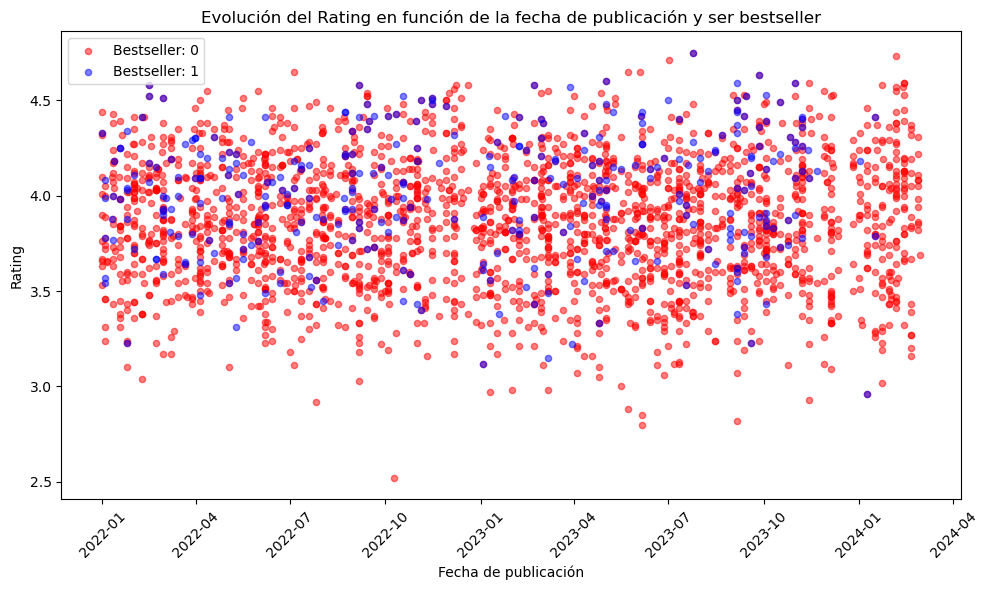

In [16]:

variable = 'Rating'
# Convertir la columna 'DatePublished' a formato de fecha
df['DatePublished'] = pd.to_datetime(df['DatePublished'])

# Filtrar solo los libros a partir de 2018
df2 = df[df['DatePublished'].dt.year >= 2022]

# Ordenar el DataFrame por la columna 'DatePublished'
df2 = df2.sort_values(by='DatePublished')

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
colors = {True: 'blue', False: 'red'}
for bs, group in df2.groupby('potencialBS'):
    plt.scatter(group['DatePublished'], group[variable], s=20, alpha=0.5, color=colors[bs], label=f'Bestseller: {bs}', marker='o')
plt.xlabel('Fecha de publicación')
plt.ylabel(variable)
plt.title(f'Evolución del {variable} en función de la fecha de publicación y ser bestseller')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlaciones

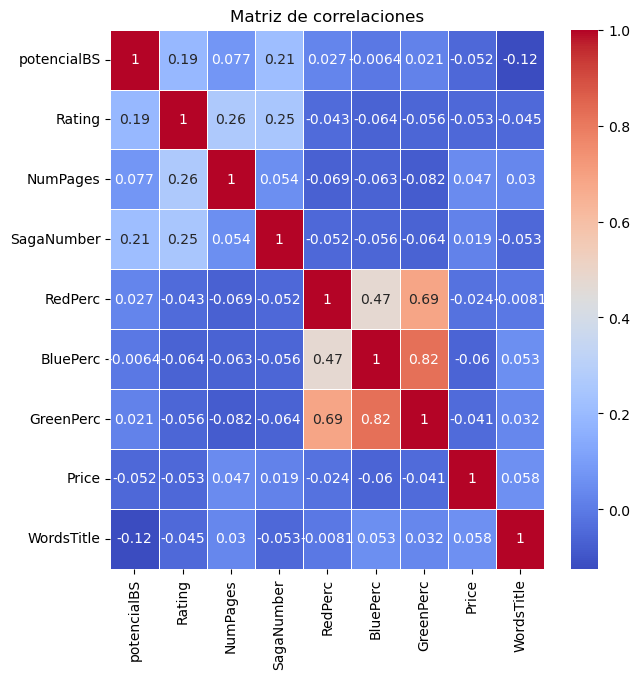

In [17]:
variablesCorrelacion = ["potencialBS", "Rating", "NumPages", "SagaNumber", "RedPerc", "BluePerc", "GreenPerc", "Price", "WordsTitle"]

# Calcula la matriz de correlación
correlation_matrix = df[variablesCorrelacion].corr()

# Crea el mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlaciones')
plt.show()